In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import numpy as np
import math

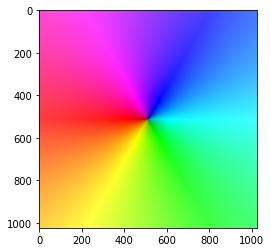

In [2]:
def complex2hsv(array):
    """
    輸入一個 2d 複數影像 輸出 hsv
    """
    w, h = array.shape
    array_h = np.full((w, h), 180) + np.angle(array) * 180 / math.pi
    #array_h = np.angle(array)
    array_l = np.full((w, h), 1) - np.full((w, h), 1) / (np.full((w, h), 1) + np.power(np.absolute(array), 0.3))      
    #array_l = np.power(0.5, numpy.absolute(array)) 
    array_s = np.full((w, h), 1)
    
    array_ans = np.zeros((w, h, 3), dtype=np.float32)
    for x in range(0, w):
        for y in range(0, h):
            array_ans[x, y, 0] = array_h[x, y]
            array_ans[x, y, 1] = array_l[x, y]
            array_ans[x, y, 2] = array_s[x, y]
    
    return array_ans

w, h = 1024, 1024
img = np.full((w, h), 1j)

for x in range(0, w):
    for y in range(0, h):
        k = (y - h / 2) * 0.01 + (w / 2 - x) * 0.01j
        img[x, y] = k
        
img = complex2hsv(img)
test = cv2.cvtColor(img, cv2.COLOR_HLS2RGB)
plt.imshow(test)

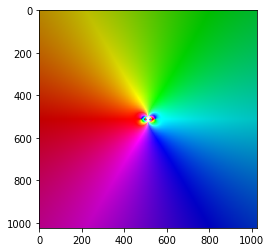

In [3]:
import cmath

img = np.full((w, h), 1j)

for x in range(0, w):
    for y in range(0, h):
        k = (y - h / 2) * 0.01 + (w / 2 - x) * 0.01j
        if abs(k) == 0:
            img[x, y] = 0
        else:
            img[x, y] = cmath.sin(1 / k)
        
img = complex2hsv(img)
test = cv2.cvtColor(img, cv2.COLOR_HLS2RGB)
plt.imshow(test)

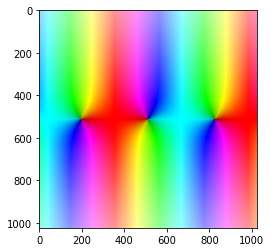

In [4]:
img = np.full((w, h), 1j)

for x in range(0, w):
    for y in range(0, h):
        k = (y - h / 2) * 0.01 + (w / 2 - x) * 0.01j
        img[x, y] = cmath.sin(k)
        
img = complex2hsv(img)
test = cv2.cvtColor(img, cv2.COLOR_HLS2RGB)
plt.imshow(test)

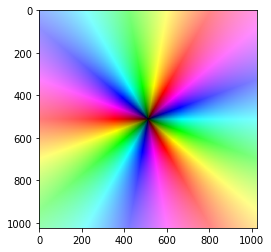

In [12]:
img = np.full((w, h), 1j)

for x in range(0, w):
    for y in range(0, h):
        k = (y - h / 2) * 0.01 + (w / 2 - x) * 0.01j
        img[x, y] = k ** 3 / 4
        
img = complex2hsv(img)
test = cv2.cvtColor(img, cv2.COLOR_HLS2RGB)
test = test * 255
test = test.astype(np.uint8)
plt.imshow(test)

In [13]:
import cv2
cv2.imwrite("test.png",test)

True